In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.DataFrame(np.array([[26, 900], [28, 600], [29, 600], [30, 800],
                            [35, 1300], [36, 1560], [37, 1370], [38, 1620],
                            [39, 800], [40, 650], [41, 820], [42, 625]]),

columns = ['Age', 'hour'])
df.head(5)

,Age,hour
0,26,900
1,28,600
2,29,600
3,30,800
4,35,1300


In [5]:
KM_model = KMeans(n_clusters = 3)
y_pred = KM_model.fit_predict(df[['Age', 'hour']])
df['cluster'] = y_pred
df.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Age,hour,cluster
0,26,900,0
1,28,600,2
2,29,600,2
3,30,800,0
4,35,1300,1


Text(0, 0.5, 'hour')

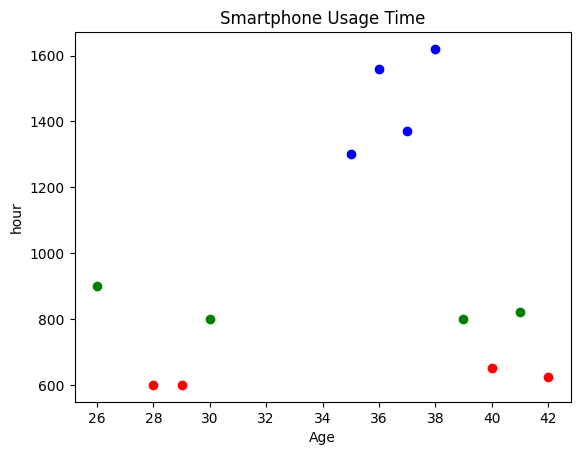

In [8]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1['Age'], df1['hour'], color = 'green')
plt.scatter(df2['Age'], df2['hour'], color = 'blue')
plt.scatter(df3['Age'], df3['hour'], color = 'red')

plt.title('Smartphone Usage Time')
plt.xlabel('Age')
plt.ylabel('hour')

In [9]:
df.describe()

,Age,hour,cluster
count,12.000000,12.000000,12.000000
mean,35.083333,970.416667,1.000000
std,5.484828,383.752159,0.852803
min,26.000000,600.000000,0.000000
25%,29.750000,643.750000,0.000000
50%,36.500000,810.000000,1.000000
75%,39.250000,1317.500000,2.000000
max,42.000000,1620.000000,2.000000


In [11]:
scaler = MinMaxScaler()
scaler.fit(df[['hour']])
df['hour'] = scaler.transform(df[['hour']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head(5)

,Age,hour,cluster
0,0.0000,0.294118,0
1,0.1250,0.000000,2
2,0.1875,0.000000,2
3,0.2500,0.196078,0
4,0.5625,0.686275,1


In [13]:
kM_model = KMeans(n_clusters = 3)
y_pred = kM_model.fit_predict(df[['Age', 'hour']])
df['cluster'] = y_pred
df.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Age,hour,cluster
0,0.0000,0.294118,0
1,0.1250,0.000000,0
2,0.1875,0.000000,0
3,0.2500,0.196078,0
4,0.5625,0.686275,1


In [14]:
kM_model.cluster_centers_

array([[0.140625  , 0.12254902],
       [0.65625   , 0.84558824],
       [0.90625   , 0.12132353]])

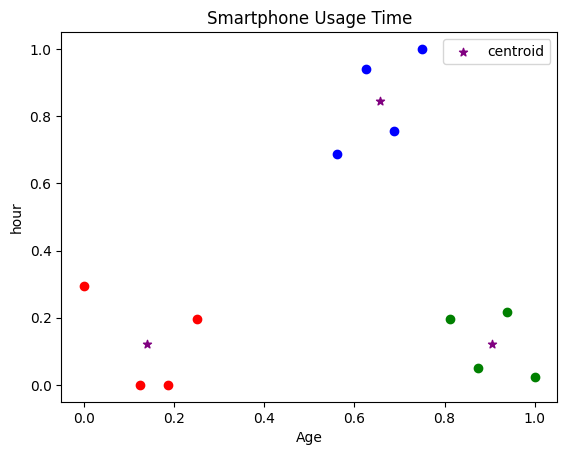

In [15]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1['Age'], df1['hour'], color = 'red')
plt.scatter(df2['Age'], df2['hour'], color = 'blue')
plt.scatter(df3['Age'], df3['hour'], color = 'green')

plt.scatter(kM_model.cluster_centers_[ :, 0], kM_model.cluster_centers_[ :, 1],
            color = 'purple', marker = '*', label = 'centroid')
plt.title('Smartphone Usage Time')
plt.xlabel('Age')
plt.ylabel('hour')
plt.legend()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

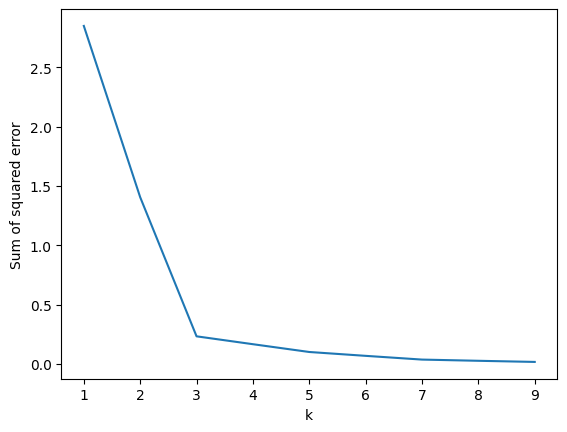

In [16]:
k_range = range(1, 10)
sse = []
for k in range(1, 10):
  km = KMeans(n_clusters = k)
  km.fit(df[['Age', 'hour']])
  sse.append(km.inertia_)
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.plot(k_range, sse)